In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"

from scipy.io import savemat, loadmat
import colorsys

In [2]:
# %matplotlib widget 

## Load data

In [3]:
filename = './S_q_kxy_fix_d.mat'
data = loadmat(filename)
k_grid = data['k_grid']
S_q_kxy = data['S_q_kxy'].T

#### Meshgrid ####
n_grid = 100
x = np.linspace(-1,1,n_grid+1)
y = np.linspace(-1,1,n_grid+1)
z = np.linspace(-1,1,n_grid+1)

r_grid = np.meshgrid(x,y,z) 

# calculate scattering function
box_size = 2
n_grid_scale = 256
scale = n_grid_scale/r_grid[0].shape[0]
dq = 2*np.pi/box_size
qq = np.arange(n_grid_scale/2)*dq

#### Wave vector distribution ####
kz_list = np.arange(10)+1
kxy_list = np.arange(10)+1
kz_grid, kxy_grid = np.meshgrid(kz_list,kxy_list)

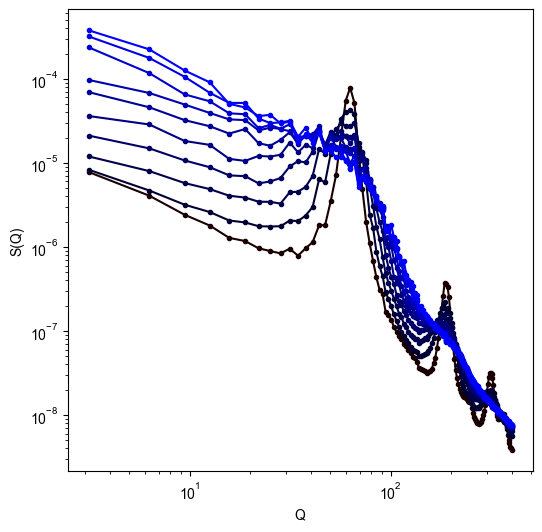

In [4]:
## plot results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i in range(len(k_grid)):
    h = -np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+1
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    if k_grid[i][1]==1:
        ax.plot(qq[1:],S_q_kxy[1:,i],'.-',color=color)

ax.set_xlabel('Q')
ax.set_ylabel('S(Q)')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
plt.show()

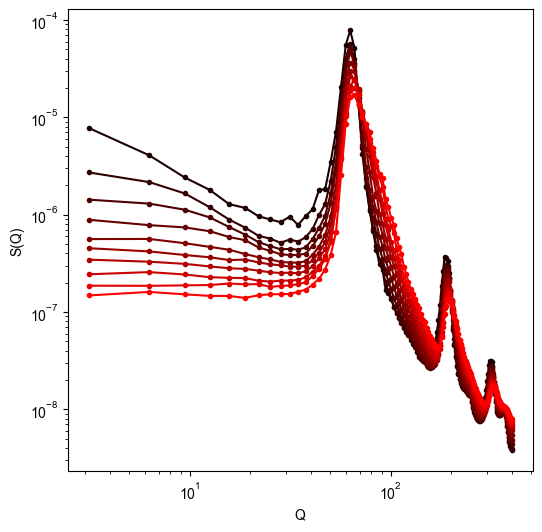

In [5]:
## plot results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for i in range(len(k_grid)):
    h = -np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+1
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    if k_grid[i][0]==1:
        ax.plot(qq[1:],S_q_kxy[1:,i],'.-',color=color)

ax.set_xlabel('Q')
ax.set_ylabel('S(Q)')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
plt.show()

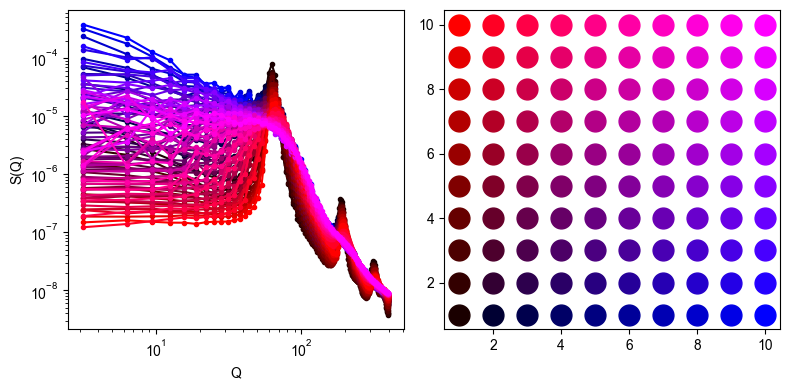

In [6]:
## plot results
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)

for i in range(len(k_grid)):
    h = -np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+1
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    
    ax.plot(qq[1:],S_q_kxy[1:,i],'.-',color=color)

ax.set_xlabel('Q')
ax.set_ylabel('S(Q)')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])

ax = fig.add_subplot(1,2,2)
for i in range(len(k_grid)):
    h = -np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+1
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])

    color = colorsys.hsv_to_rgb(h,s,v)

    
    ax.plot(k_grid[i][0],k_grid[i][1],'.',color=color,ms=30)


# ax.set_xlim([0,100])
# ax.set_ylim([1e-6,2e0])
plt.tight_layout()
plt.show()

## SVD

In [7]:
f_F = lambda x: np.log(x)-np.mean(np.log(x),axis=0) # N by 80
F = f_F(S_q_kxy.T)
U, S, Vh = np.linalg.svd(F)
# sgn = np.sign(Vh[:,60])
FV = F@Vh.T

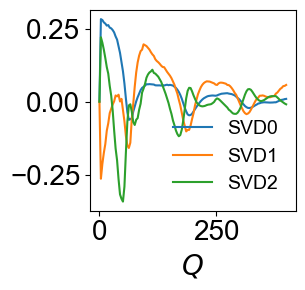

In [8]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()
ax.plot(qq,Vh[0], label='SVD0')
ax.plot(qq,Vh[1], label='SVD1')
ax.plot(qq,Vh[2], label='SVD2')

# ax.set_xticks([0,16])
ax.set_xlabel(r'$Q$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(fontsize=14,framealpha=0,loc='lower right')

plt.tight_layout()
plt.show()

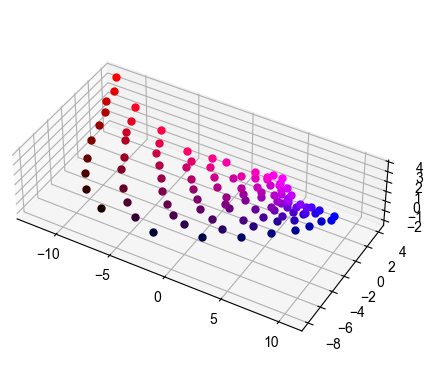

In [9]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1,projection='3d')

for i, k in enumerate(k_grid):    
    h = -np.arctan2((k_grid[i][0]-1),(k_grid[i][1]-1))/np.pi*2/3+1
    s = 1
    v = np.max([k_grid[i][0]/10,k_grid[i][1]/10])
    color = colorsys.hsv_to_rgb(h,s,v)

    ax.plot(FV[i,0],FV[i,1],FV[i,2],'.',ms=10,c=color) 
    ax.set_aspect('equal')

ax.view_init(elev=40, azim=-60)
plt.tight_layout()
plt.show()